# Solutore polinomiale
#### (versione con numpy)

Luca Mari, marzo 2023

Questo solutore approssima funzioni $\mathbb{R} \rightarrow \mathbb{R}$, per esempio $sin(x)$ tra $-\pi$ e $\pi$, mediante un polinomio di grado $n$, di cui stima i parametri.

In [347]:
import numpy as np
import matplotlib.pyplot as plt

La funzione -- che nella fase di test si supporrà ignota, ovviamente -- da approssimare:

In [348]:
the_fun = lambda x: np.sin(x)   # la funzione da approssimare
the_min = -np.pi                # l'argomento minimo
the_max = np.pi                 # l'argomento massimo

x = np.linspace(the_min, the_max, 2000)
y = the_fun(x)

Inizializza il grado del polinomio e i relativi parametri, come valori casuali da una gaussiana standard, e decidi il _learning rate_ e la dimensione del training set:

In [349]:
n = 4                           # grado del polinomio approssimante
trainingset_size = 10000        # numero di datapoint per ogni addestramento
learning_rate = 1e-6

In [350]:
def train(x:np.ndarray, y:np.ndarray, n:int, trainingset_size:int, learning_rate:float, log:bool=False) -> np.ndarray:
    w = np.random.standard_normal(size=n)
    poly = np.ndarray((n, len(x)))
    grad = np.ndarray(n)

    for i in range(trainingset_size):
        for j in range(n): poly[j] = np.power(x, j)         # forward pass
        y_pred = w.T @ poly

        if log:                                             # calcola e visualizza l'errore
            mse = np.square(y_pred - y).sum()
            if i % 1000 == 0: print(i, mse)

        grad_y_pred = 2.0 * (y_pred - y)                    # back propagation
        for j in range(n): grad[j] = (grad_y_pred * np.power(x, j)).sum()

        for j in range(n): w[j] -= learning_rate * grad[j]  # aggiorna i pesi
    return w

0 723337.8270640941
1000 40.96572456217054
2000 9.490897920386129
3000 8.832969450575051
4000 8.817576597328074
5000 8.817176976528922
6000 8.817165752167044
7000 8.81716542042938
8000 8.817165410329608
9000 8.817165410017095


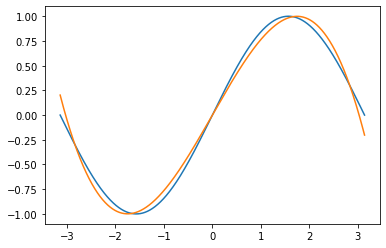

In [351]:
w = train(x, y, n, trainingset_size, learning_rate, True)

yy = np.zeros(2000)
for j in range(n): yy += w[j] * np.power(x, j)

plt.plot(x, y)
plt.plot(x, yy)
plt.show()